In [11]:
# Install packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio


In [12]:
df = pd.read_excel("/content/sample_data/COVID_Data.xlsx")

In [13]:
df.head()

,Date,Positive cases,Active cases,Recovered,Death
0,2020-09-01,2967,2967,1137,40
1,2020-09-02,3420,3420,2383,32
2,2020-09-03,3189,3189,2631,29
3,2020-09-04,2963,2963,1732,25
4,2020-09-05,3093,3093,3226,34


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            211 non-null    datetime64[ns]
 1   Positive cases  211 non-null    int64         
 2   Active cases    211 non-null    int64         
 3   Recovered       211 non-null    int64         
 4   Death           211 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 8.4 KB


In [15]:
df.shape

(211, 5)

In [16]:
df.isnull().sum()

,0
Date,0
Positive cases,0
Active cases,0
Recovered,0
Death,0


In [17]:
print(df.columns)

Index(['Date', 'Positive cases', 'Active cases', 'Recovered', 'Death'], dtype='object')


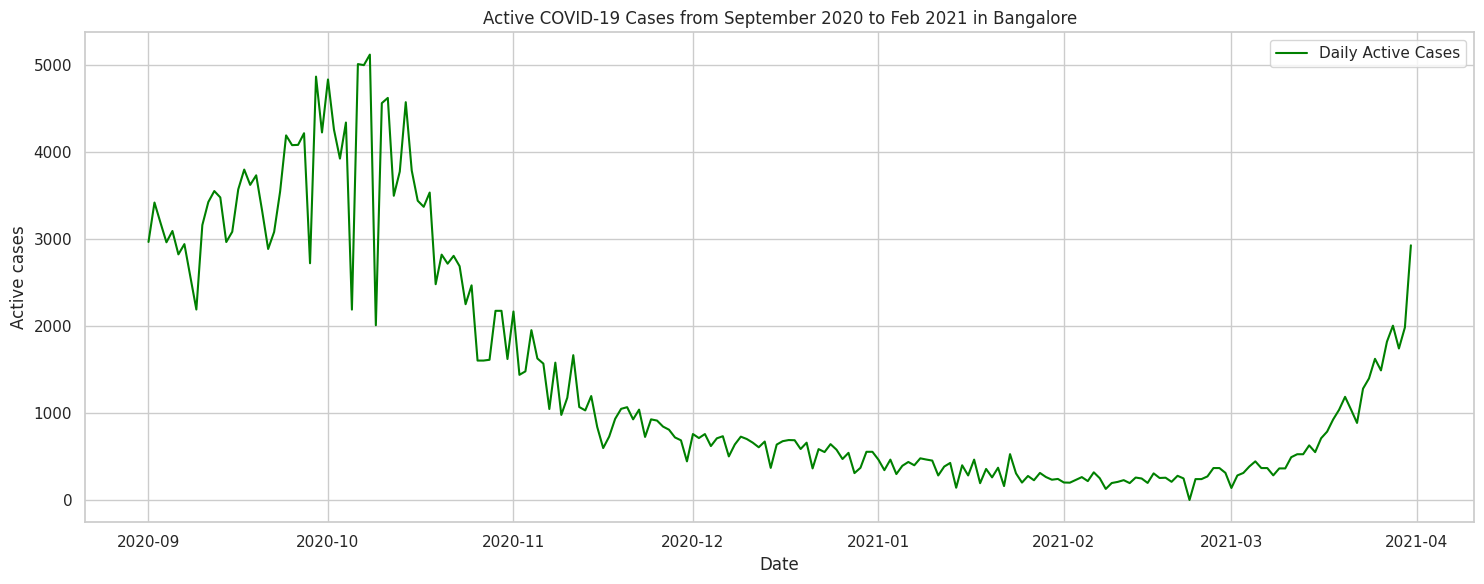

In [33]:
active = df['Active cases']
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(active, label='Daily Active Cases', color='green')
plt.title('Active COVID-19 Cases from September 2020 to Feb 2021 in Bangalore')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
#chnage the format of Date on y axis
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

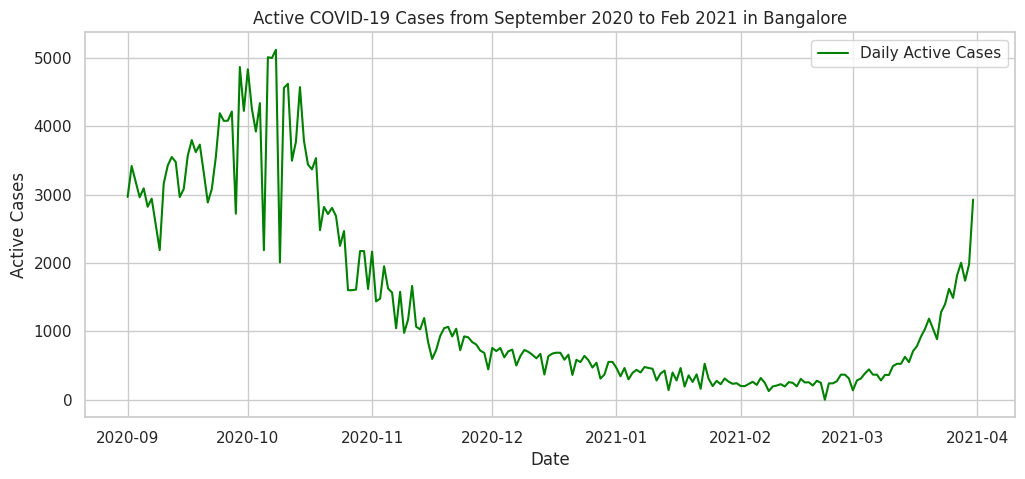

In [21]:
active = df['Active cases']

#Focus only on prediction of Active cases in Bangalore
plt.figure(figsize=(12,5))
plt.plot(active, label='Daily Active Cases', color='green')
plt.title("Active COVID-19 Cases from September 2020 to Feb 2021 in Bangalore")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [61]:
active = df['Active cases']
positive = df['Positive cases']
recovered = df['Recovered']
death = df['Death']

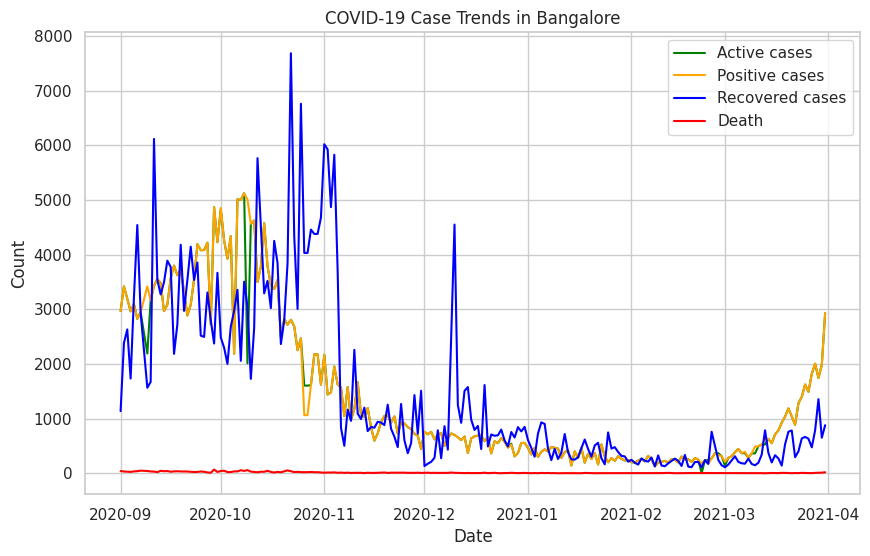

In [23]:
#plot for all the cases
plt.figure(figsize=(10, 6))
plt.plot(df['Active cases'], label='Active cases', color='green')
plt.plot(df['Positive cases'], label='Positive cases', color='orange')
plt.plot(df['Recovered'], label='Recovered cases', color='blue')
plt.plot(df['Death'], label='Death', color='red')
plt.title('COVID-19 Case Trends in Bangalore')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
start_date = "2020-09-01"
end_date = "2021-03-31"
filtered_df = df.loc[start_date:end_date]

/tmp/ipython-input-2245223207.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



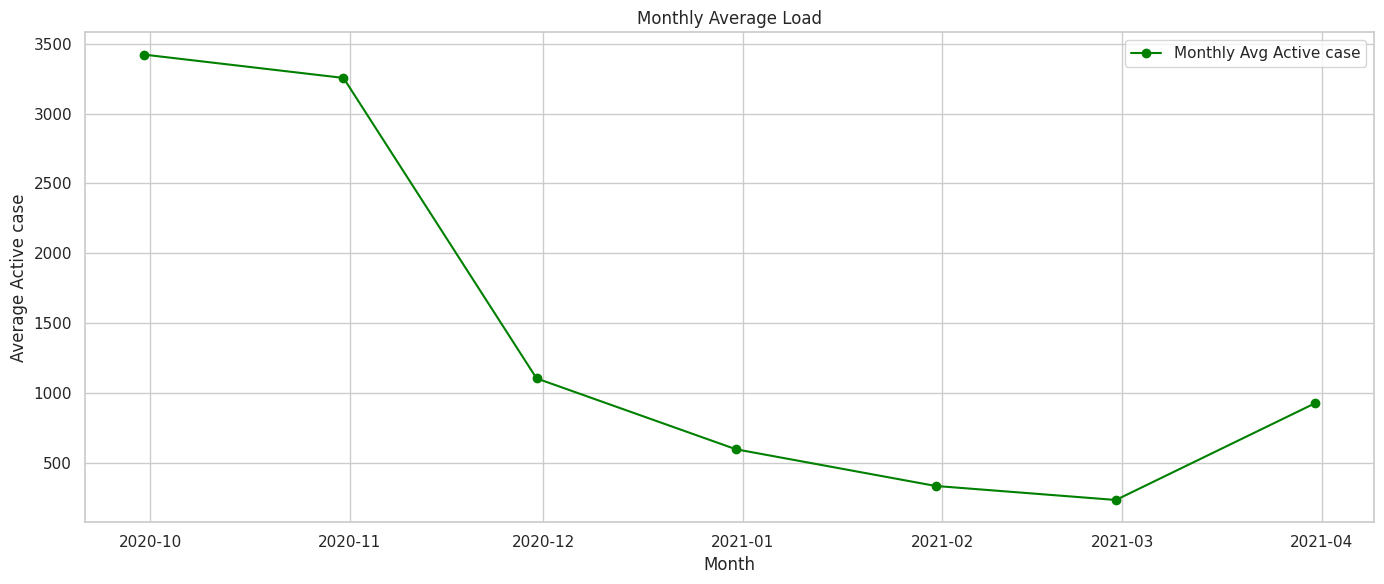

In [25]:
monthly_avg = df['Active cases'].resample('M').mean()

#Resample by month and calculate mean
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg, marker='o', color='green', label='Monthly Avg Active case')
plt.title('Monthly Average Load')
plt.xlabel('Month')
plt.ylabel('Average Active case')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

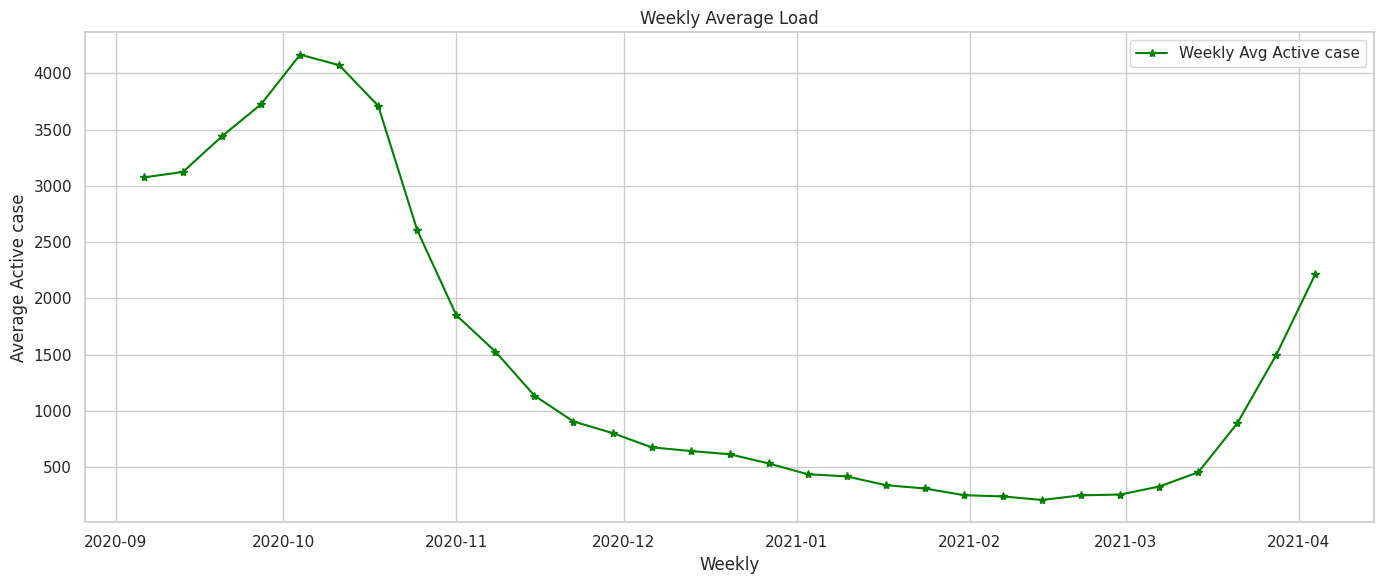

In [28]:
weekly_avg = df['Active cases'].resample('W').mean()

plt.figure(figsize=(14, 6))
plt.plot(weekly_avg.index, weekly_avg, marker='*', color='green', label='Weekly Avg Active case')
plt.title('Weekly Average Load')
plt.xlabel('Weekly')
plt.ylabel('Average Active case')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

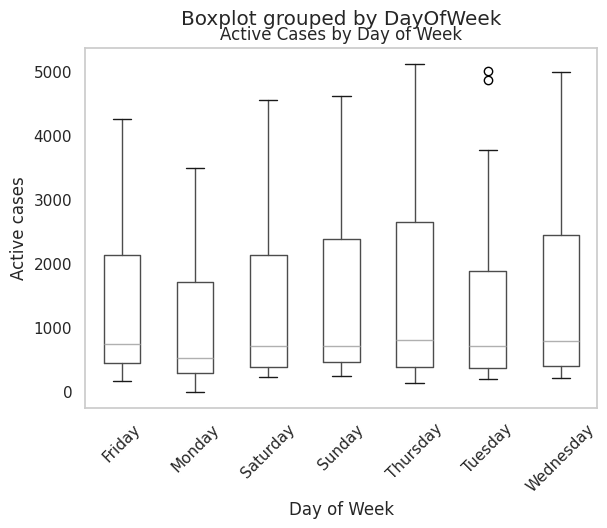

In [27]:
df['DayOfWeek'] = df.index.day_name()

plt.figure(figsize=(12,6))
df.boxplot(column='Active cases', by='DayOfWeek', grid=False)
plt.title("Active Cases by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Active cases")
plt.xticks(rotation=45)
plt.show()

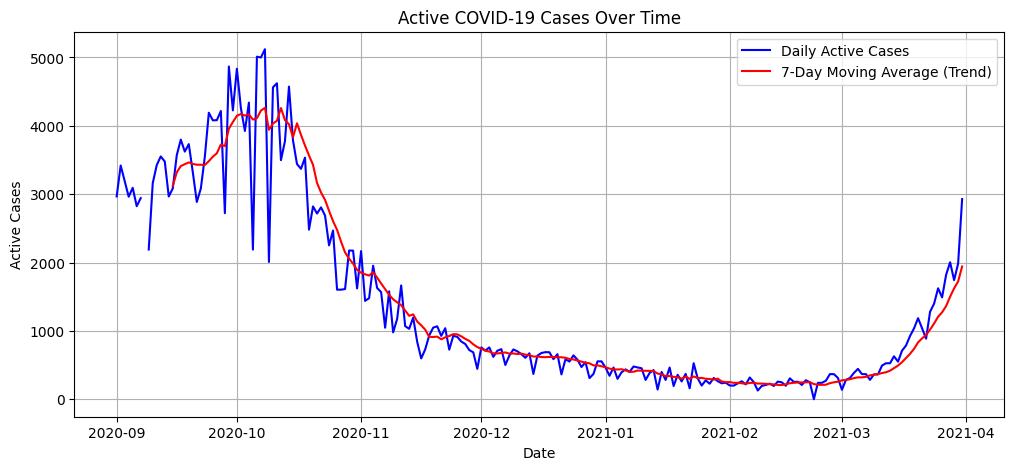

In [ ]:
# 7-day moving average
ma7 = active.rolling(window=7).mean()plt.figure(figsize=(12,5))

plt.plot(active, label='Daily Active Cases', color='blue')
plt.plot(ma7, label='7-Day Moving Average', color='red')
plt.title("Active COVID-19 Cases Over Time")
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)

plt.show()

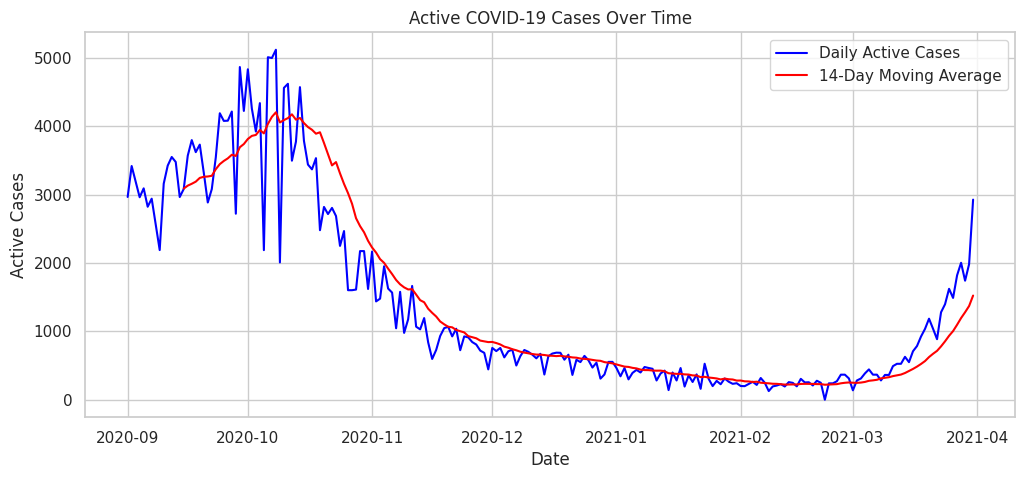

In [29]:
# 14-day moving average (smooth trend)
ma14 = active.rolling(window=14).mean()

plt.figure(figsize=(12,5))
plt.plot(active, label='Daily Active Cases', color='blue')
plt.plot(ma14, label='14-Day Moving Average', color='red')
plt.title("Active COVID-19 Cases Over Time")
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)

plt.show()

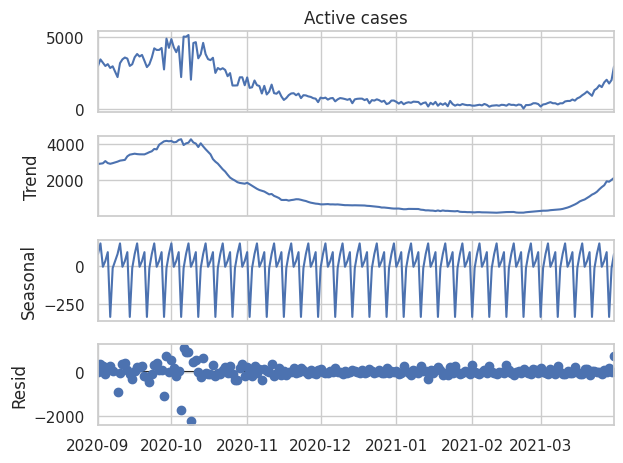

In [48]:
#Decompose the Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['Active cases'], model='additive', period=7, extrapolate_trend='freq')
decomp.plot()
plt.show()

In [60]:
active.index = pd.to_datetime(active.index, errors='coerce')

In [44]:
print(active.index)

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-09',
               '2020-09-10', '2020-09-11',
               ...
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', length=211, freq=None)


In [46]:
print(active.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [52]:
# Create training and testing data sets
train_end = '2021-02-28'
train = active.loc[:train_end]
test = active.loc['2021-03-01':]
print("Train length:", len(train))
print("Test length:", len(test))

Train length: 180
Test length: 31


In [53]:
!pip install pmdarima
import pmdarima as pm

In [54]:
# auto-arima for model selection for weekly
model_auto = pm.auto_arima(train,
                           seasonal=True,
                           m=7,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(model_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=2643.072, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2760.684, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2673.572, Time=1.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2648.287, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2758.822, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=2649.501, Time=4.84 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=2641.602, Time=1.69 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=2643.718, Time=1.83 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=2639.432, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=2685.179, Time=0.23 sec
 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=2641.420, Time=1.17 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=2641.417, Time=0.95 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=2

In [55]:
model = pm.ARIMA(order=(1, 1, 2), seasonal_order=(1, 0, 0, 7))
model.fit(train)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(order=(1, 1, 2), seasonal_order=(1, 0, 0, 7))

In [56]:
# Forecast the next 7 days
forecast_7days = model.predict(n_periods=7)

# Forecast the next 14 days
forecast_14days = model.predict(n_periods=14)

# Forecast the next 30 days
forecast_30days = model.predict(n_periods=30)

print("Forecast for the next 7 days:", forecast_7days)
print("Forecast for the next 14 days:", forecast_14days)
print("Forecast for the next 30 days:", forecast_30days)


Forecast for the next 7 days: 180    150.100225
181    261.976935
182    253.171726
183    262.216121
184    300.819589
185    294.353657
186    259.254895
dtype: float64
Forecast for the next 14 days: 180    150.100225
181    261.976935
182    253.171726
183    262.216121
184    300.819589
185    294.353657
186    259.254895
187    173.231636
188    220.094977
189    208.901618
190    205.535222
191    217.439231
192    206.585121
193    182.284727
dtype: float64
Forecast for the next 30 days: 180    150.100225
181    261.976935
182    253.171726
183    262.216121
184    300.819589
185    294.353657
186    259.254895
187    173.231636
188    220.094977
189    208.901618
190    205.535222
191    217.439231
192    206.585121
193    182.284727
194    132.535255
195    148.319971
196    135.292377
197    126.416088
198    124.749231
199    112.166125
200     92.794642
201     61.127268
202     61.418951
203     47.721803
204     35.949285
205     27.802683
206     14.227322
207     -2.604

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is av

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test[:7]
y_pred_7days = forecast_7days

mae_7 = mean_absolute_error(y_true, y_pred_7days)
rmse_7 = np.sqrt(mean_squared_error(y_true, y_pred_7days))

print("7 Days MAE:", mae_7)
print("7 Days RMSE:", rmse_7)


7 Days MAE: 76.61532897571922
7 Days RMSE: 89.72534108028763


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test[:14]
y_pred_14days = forecast_14days

mae_14 = mean_absolute_error(y_true, y_pred_14days)
rmse_14 = np.sqrt(mean_squared_error(y_true, y_pred_14days))

print("14 Days MAE:", mae_14)
print("14 Days RMSE:", rmse_14)

14 Days MAE: 164.51676935140378
14 Days RMSE: 205.37969978664924


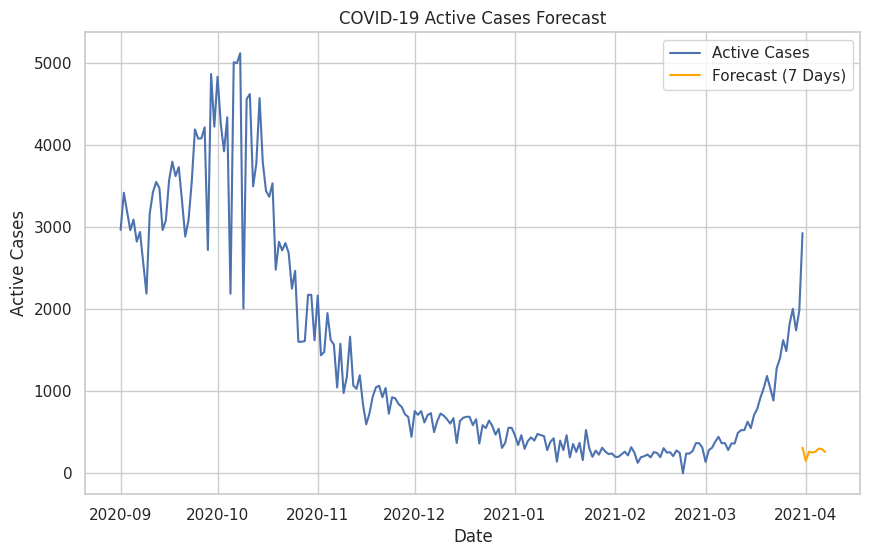

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(active.index, active, label='Active Cases')
forecast_dates_7 = pd.date_range(start=active.index[-1], periods=8, freq='D')
plt.plot(forecast_dates_7, np.concatenate([train[-1:], forecast_7days]), label='Forecast (7 Days)', color='orange')
plt.title('COVID-19 Active Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


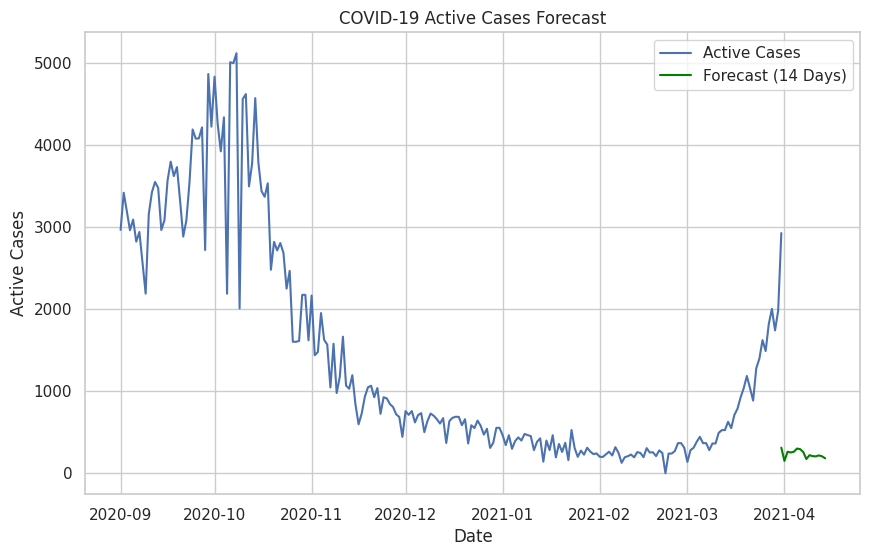

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(active.index, active, label='Active Cases')
forecast_dates_14 = pd.date_range(start=active.index[-1], periods=15, freq='D')
plt.plot(forecast_dates_14, np.concatenate([train[-1:], forecast_14days]), label='Forecast (14 Days)', color='green')
plt.title('COVID-19 Active Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


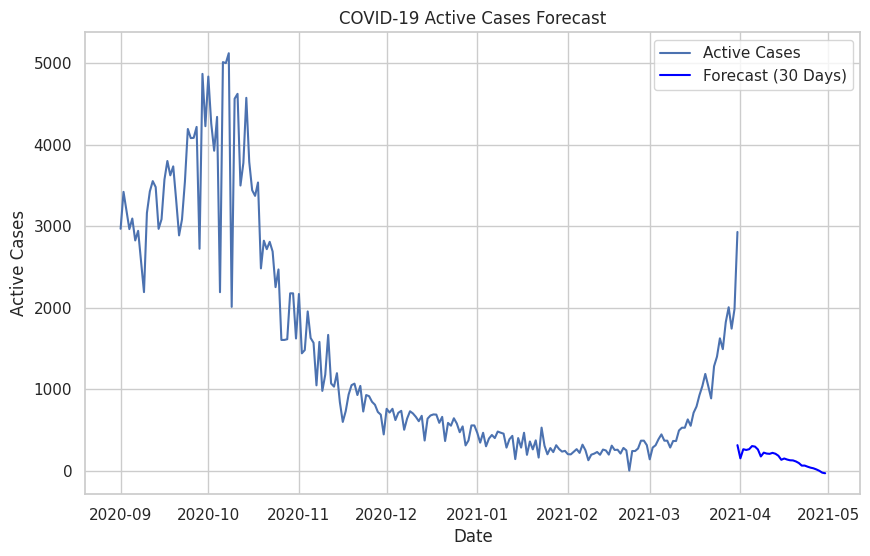

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(active.index, active, label='Active Cases')
forecast_dates_30 = pd.date_range(start=active.index[-1], periods=31, freq='D')
plt.plot(forecast_dates_30, np.concatenate([train[-1:], forecast_30days]), label='Forecast (30 Days)', color='blue')
plt.title('COVID-19 Active Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
print(active.index)

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-09',
               '2020-09-10', '2020-09-11',
               ...
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', length=211, freq=None)


In [71]:
print(active.head())

Date
2020-09-01    2967
2020-09-02    3420
2020-09-03    3189
2020-09-04    2963
2020-09-05    3093
Name: Active cases, dtype: int64


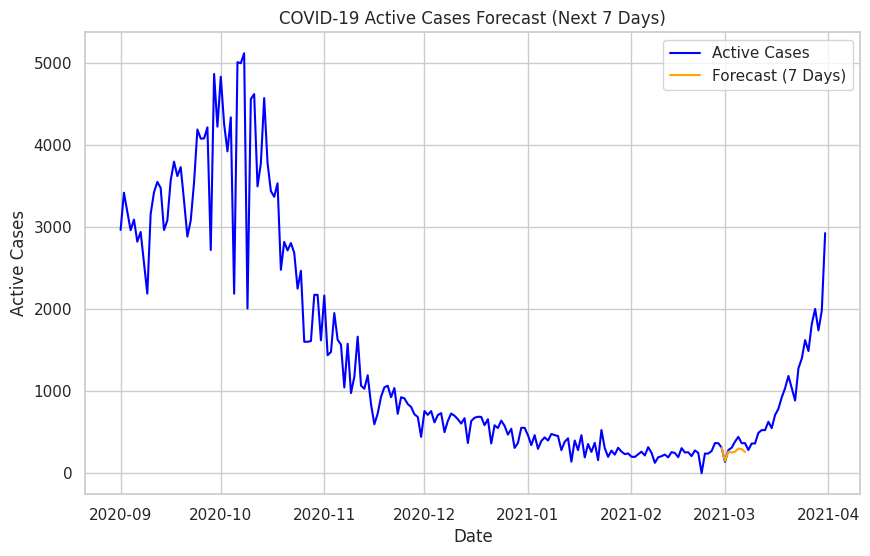

In [80]:
forecast_dates_7 = pd.date_range(start=train.index[-1], periods=8, freq='D')
forecast_7days_full = np.concatenate([train[-1:], forecast_7days])
plt.figure(figsize=(10, 6))
plt.plot(active.index, active, label='Active Cases', color='blue')
plt.plot(forecast_dates_7, forecast_7days_full, label='Forecast (7 Days)', color='orange')
plt.title('COVID-19 Active Cases Forecast (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


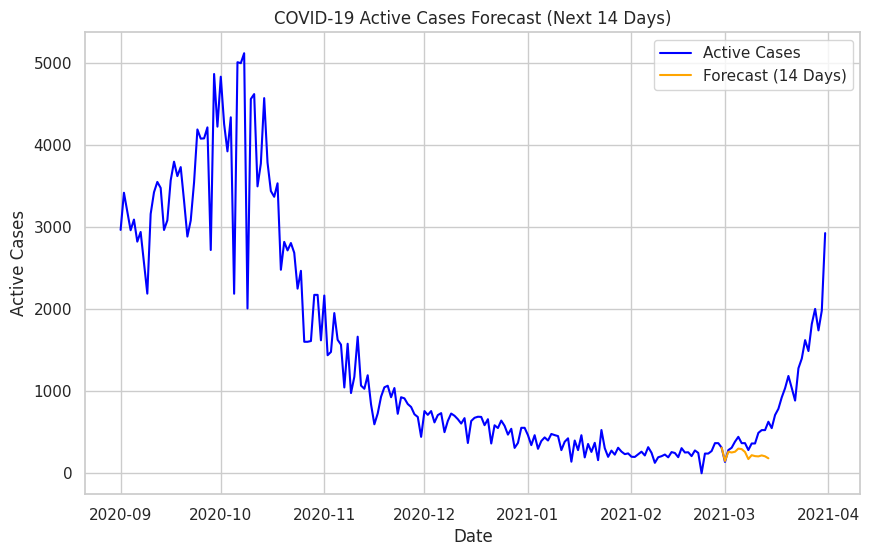

In [81]:
forecast_dates_14 = pd.date_range(start=train.index[-1], periods=15, freq='D')
forecast_14days_full = np.concatenate([train[-1:], forecast_14days])
plt.figure(figsize=(10, 6))
plt.plot(active.index, active, label='Active Cases', color='blue')
plt.plot(forecast_dates_14, forecast_14days_full, label='Forecast (14 Days)', color='orange')
plt.title('COVID-19 Active Cases Forecast (Next 14 Days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


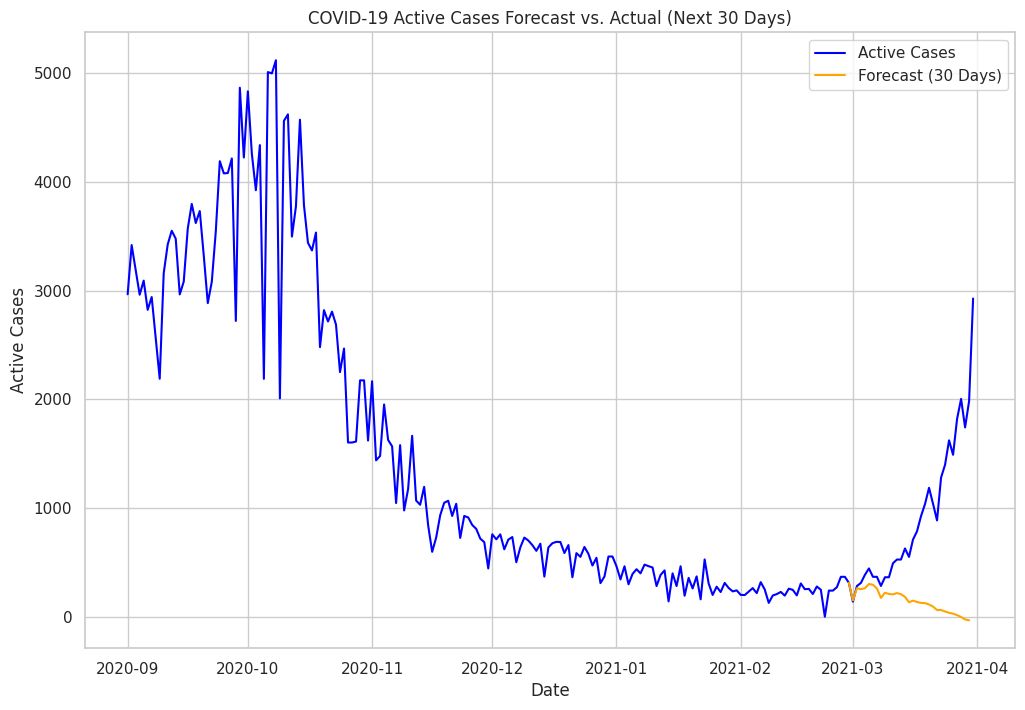

In [82]:
forecast_dates_30 = pd.date_range(start=train.index[-1], periods=31, freq='D')
forecast_30days_full = np.concatenate([train[-1:], forecast_30days])
plt.figure(figsize=(12, 8))
plt.plot(active.index, active, label='Active Cases', color='blue')
plt.plot(forecast_dates_30, forecast_30days_full, label='Forecast (30 Days)', color='orange')
plt.title('COVID-19 Active Cases Forecast vs. Actual (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


In [85]:
!pip install plotly

In [ ]:
import plotly.express as px
fig = px.line(df.reset_index(), x='Date', y='Active cases', title='Interactive Load Plot')
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(df.reset_index(), x='Date', y='Positive cases', title='Interactive Load Plot')
fig.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2021-03-01 00:00:00'), Timestamp('2021-03-02 00:00:00'),
       Timestamp('2021-03-03 00:00:00'), Timestamp('2021-03-04 00:00:00'),
       Timestamp('2021-03-05 00:00:00'), Timestamp('2021-03-06 00:00:00'),
       Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-08 00:00:00'),
       Timestamp('2021-03-09 00:00:00'), Timestamp('2021-03-10 00:00:00'),
       Timestamp('2021-03-11 00:00:00'), Timestamp('2021-03-12 00:00:00'),
       Timestamp('2021-03-13 00:00:00'), Timestamp('2021-03-14 00:00:00'),
       Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-16 00:00:00'),
       Timestamp('2021-03-17 00:00:00'), Timestamp('2021-03-18 00:00:00'),
       Timestamp('2021-03-19 00:00:00'), Timestamp('2021-03-20 00:00:00'),
       Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-22 00:00:00'),
       Timestamp('2021-03-23 00:00:00'), Timestamp('2021-03-24 00:00:00'),
       Timestamp('2021-03-25 00:00:00'), Timestamp('2021-03-26 00:00:00'),
       Timestamp('2021-03-27 00:00:00'), Timestamp('2021-03-28 00:00:00'),
       Timestamp('2021-03-29 00:00:00'), Timestamp('2021-03-30 00:00:00'),
       Timestamp('2021-03-31 00:00:00'), 'Forecast'], dtype=object)

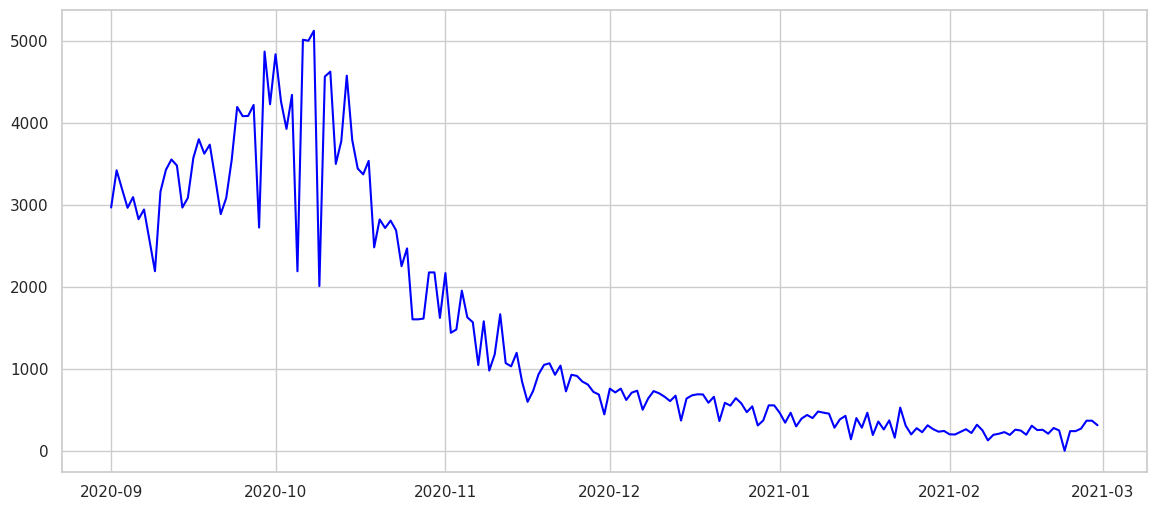

In [95]:
forecast_test = model.predict(n_periods=len(test))
test_forecast = pd.Series(forecast_test.values, index=test.index)
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test_forecast.index, test_forecast, label='Forecast', color='orange', linestyle='--')
plt.axvline(train.index[-1], color='black', linestyle=':', label='Train/Test Split')
plt.title("Training vs Test vs Forecast")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)
plt.show()